# Machine Learning Analysis for Early Detection of Heart Failure

## Import data

In [3]:
"""
Data Preprocessing Script
Author: deng.wei
Date: 3.27
Function: Preprocess the heart disease dataset, including handling outliers, categorical encoding, feature standardization, and data splitting.
"""

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from IPython.display import display

data_file = os.path.join(os.getcwd(), '..','data', 'heart.csv')
print(os.getcwd())

# Check if the data file exists
if not os.path.exists(data_file):
    display(f"Data file not found: {data_file}")
else:
    try:
        data = pd.read_csv(data_file)
        print(f"Data loaded successfully, shape: {data.shape}")  # Expected shape is (918, 12)
    except Exception as e:
        display(f"Error loading data: {e}")


/Users/dengwei/DSML/feature_implementation
Data loaded successfully, shape: (918, 12)


---
## Preprocessing

In [4]:
"""
Data Preprocessing Script
Author: deng.wei
Date: 3.27
Function: Preprocessing the heart disease dataset
"""

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from IPython.display import display

# Go up one directory to access the dataset
data_file = os.path.join(os.getcwd(), '..', 'data', 'heart.csv')
# Check if the data file exists
if not os.path.exists(data_file):
    display(f"Data file not found: {data_file}")
else:
    try:
        data = pd.read_csv(data_file)
        print(f"Data loaded successfully, shape: {data.shape}")  # Expected shape is (918, 12)
    except Exception as e:
        display(f"Error loading data: {e}") 
    
    # Handling outliers
    '''
    deng.wei: Blood pressure and cholesterol should not be zero
    '''
    bp_zero_count = (data['RestingBP'] == 0).sum()
    chol_zero_count = (data['Cholesterol'] == 0).sum()
    data['RestingBP'] = data['RestingBP'].replace(0, data['RestingBP'].median())
    data['Cholesterol'] = data['Cholesterol'].replace(0, data['Cholesterol'].median())
    print("Outlier handling completed")
    print(f"Outlier handling: Replaced {bp_zero_count} zero values in blood pressure, {chol_zero_count} zero values in cholesterol")
    
    '''
    yue.yao: Copy global data for EDA analysis
    '''
    eda_data = data.copy()
    
    # Category encoding
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    print("Categorical feature encoding completed")

    # Splitting dataset
    X = data.drop('HeartDisease', axis=1)
    y = data['HeartDisease']
    
    # First, split into training and temporary sets (80% for training, 20% for temporary)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )
    
    # Then, split the temporary set into validation and test sets (each 10% of the original data)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size=0.5, 
        random_state=42, 
        stratify=y_temp
    )
    
    print(f"Dataset split completed:")
    print(f"Training set {X_train.shape} ({len(X_train)/len(X):.1%})")
    print(f"Validation set {X_val.shape} ({len(X_val)/len(X):.1%})")
    print(f"Test set {X_test.shape} ({len(X_test)/len(X):.1%})")
    
    # Standardizing numerical features
    numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    scaler = StandardScaler()
    # Remove the line: data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    # Because standardization is done only for training, validation, and test sets

    # Standardizing the training set using its mean and standard deviation
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

    # Standardizing the validation and test sets using the training set's mean and standard deviation
    X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    print("Numerical feature standardization completed")


Data loaded successfully, shape: (918, 12)
Outlier handling completed
Outlier handling: Replaced 1 zero values in blood pressure, 172 zero values in cholesterol
Categorical feature encoding completed
Dataset split completed:
Training set (734, 11) (80.0%)
Validation set (92, 11) (10.0%)
Test set (92, 11) (10.0%)
Numerical feature standardization completed


## Dataset Persistence

In [5]:
"""
Dataset Persistence
Author: deng.wei
Date: 4.15
"""
# Combine features and labels for export
train_full = X_train.copy()
train_full["HeartDisease"] = y_train

val_full = X_val.copy()
val_full["HeartDisease"] = y_val

# Not include the reult in test data
test_full = X_test.copy()

# Create 'report' folder if it doesn't exist
report_dir = os.path.join(os.getcwd(), '..', 'report')
os.makedirs(report_dir, exist_ok=True)


# Define output paths
train_path = os.path.join(report_dir, f"train_set_snapshot_.csv")
val_path   = os.path.join(report_dir, f"val_set_snapshot_.csv")
test_path  = os.path.join(report_dir, f"test_set_snapshot_.csv")

train_full.to_csv(train_path, index=False)
val_full.to_csv(val_path, index=False)
test_full.to_csv(test_path, index=False)

print("Dataset snapshots saved")
print(f"Training set: {train_path}")
print(f"Validation set: {val_path}")
print(f"Test set: {test_path}")


Dataset snapshots saved
Training set: /Users/dengwei/DSML/feature_implementation/../report/train_set_snapshot_.csv
Validation set: /Users/dengwei/DSML/feature_implementation/../report/val_set_snapshot_.csv
Test set: /Users/dengwei/DSML/feature_implementation/../report/test_set_snapshot_.csv


---
## Exploratory Data Analysis (EDA)

In [3]:
"""
探索性分析数据EDA
作者: yue.yao
日期: 4.6
功能: 对心脏疾病数据集进行探索性分析，完成数据可视化
"""
import matplotlib.pyplot as plt
import seaborn as sns

# 数据全局概览
eda_data.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.538126,240.581699,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,17.990127,53.982967,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,80.000000,85.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,214.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [4]:
# 检测空值
eda_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
# 检测重复数据
eda_data.duplicated().sum()

0

In [6]:
# 概览非数值数据分布
for i in eda_data.columns:
  if eda_data[i].dtype == 'object':
    print(f'column : {i}')
    print(eda_data[i].value_counts())
    print('----------------------------')

column : Sex
Sex
M    725
F    193
Name: count, dtype: int64
----------------------------
column : ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------
column : RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------
column : ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------------------
column : ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
----------------------------


In [7]:
# 对数值数据进行相关性分析
num_cor = eda_data.corr(numeric_only=True)
num_cor

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263054,0.030979,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.263054,1.000000,0.090835,0.067896,-0.109771,0.174130,0.117798
Cholesterol,0.030979,0.090835,1.000000,-0.008045,0.026734,0.056731,0.042988
FastingBS,0.198039,0.067896,-0.008045,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.109771,0.026734,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.174130,0.056731,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.117798,0.042988,0.267291,-0.400421,0.403951,1.000000


<Axes: >

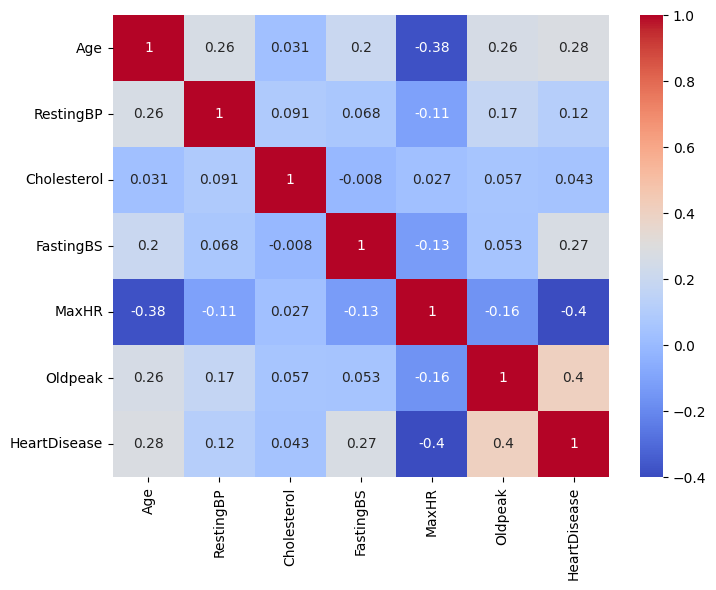

In [8]:
# 绘制相关性热力图
plt.figure(figsize=(8,6))
sns.heatmap(num_cor, annot=True, cmap='coolwarm')

> 结论：  
与HeartDisease相关性较高的数据是Oldpeak，FastingBS，Age  
> Conclusion:  
The data with high correlation with HeartDisease are Oldpeak, FastingBS, and Age

In [9]:
# 对比Oldpeak对于患病和非患病人群的平均数值分布
print(eda_data.groupby('HeartDisease')['Oldpeak'].describe())

              count      mean       std  min  25%  50%  75%  max
HeartDisease                                                    
0             410.0  0.408049  0.699709 -1.1  0.0  0.0  0.6  4.2
1             508.0  1.274213  1.151872 -2.6  0.0  1.2  2.0  6.2


<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

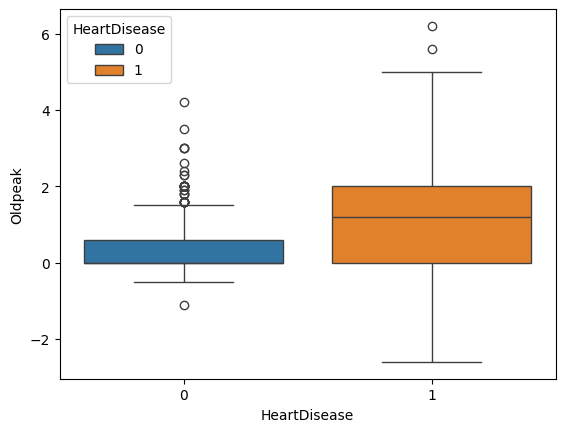

In [10]:
# 箱型图对比Oldpeak数值分布
sns.boxplot(x='HeartDisease', y='Oldpeak', data=eda_data, hue='HeartDisease')

> 结论：  
心力衰竭患者的Oldpeak指数通常比非患者要高，数值大多分布在1.5及以上  
Conclusion:  
The Oldpeak index was generally higher in patients with heart failure than in non-patients, with values of 1.5 and above mostly distributed

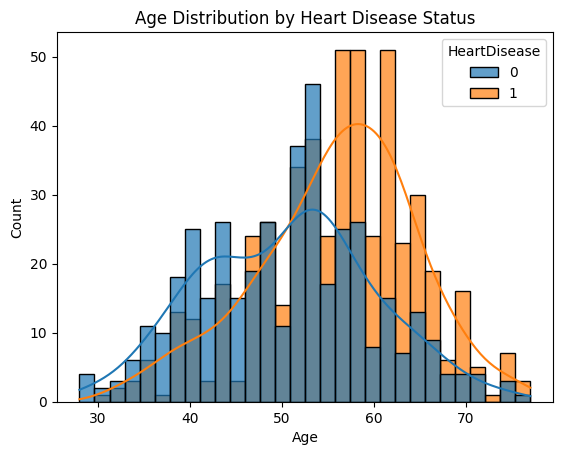

In [11]:
# 患者和非患者的年龄分布
sns.histplot(
    data=eda_data, 
    x='Age', 
    hue='HeartDisease',
    bins=30, 
    kde=True, 
    alpha=0.7
)
plt.title("Age Distribution by Heart Disease Status")
plt.show()

<Axes: xlabel='HeartDisease', ylabel='Age'>

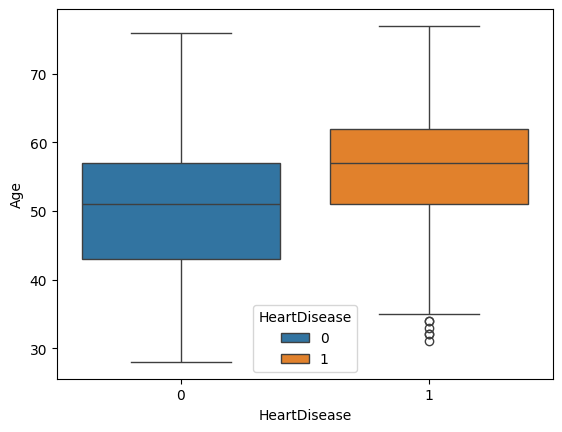

In [12]:
# 箱型图对比Age数值分布
sns.boxplot(x='HeartDisease', y='Age', data=eda_data, hue='HeartDisease')

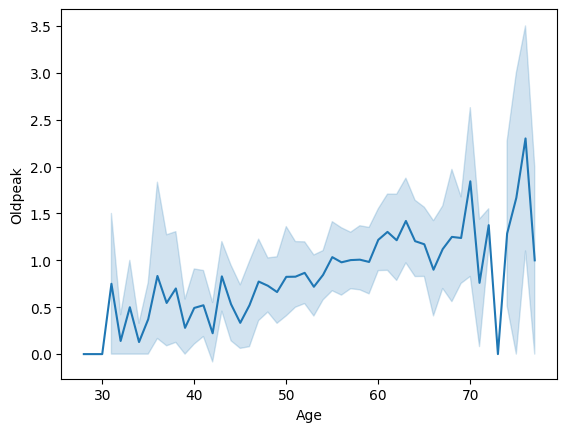

In [13]:
# 静息血压岁年龄变化
sns.lineplot(x='Age', y='Oldpeak', data=eda_data)
plt.show()

> 结论：  
Oldpeak数值随年龄增大而增加。心力衰竭患者数量随年龄上升而增加，大多患者年龄分布在60岁左右。  
Conclusion:  
Oldpeak value increases with age. The number of heart failure patients increases with age, and most patients are around 60 years old.

<Axes: xlabel='HeartDisease', ylabel='FastingBS'>

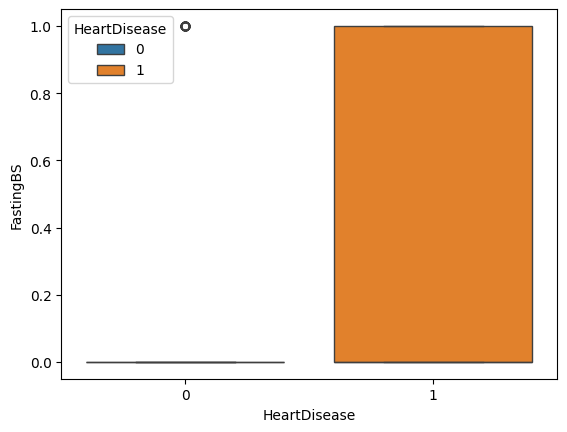

In [14]:
# 箱型图对比FastingBS数值分布
sns.boxplot(x='HeartDisease', y='FastingBS', data=eda_data, hue='HeartDisease')

> 结论：  
心力衰竭患者普遍能检测到FastingBS数值分布在0-1之间，而非患者普遍数值为0。FastingBS数值与患病情况强相关。  
Conclusion:  
Patients with heart failure generally had FastingBS values ranging from 0 to 1, while non-patients generally had values of 0. FastingBS values were strongly correlated with disease status.

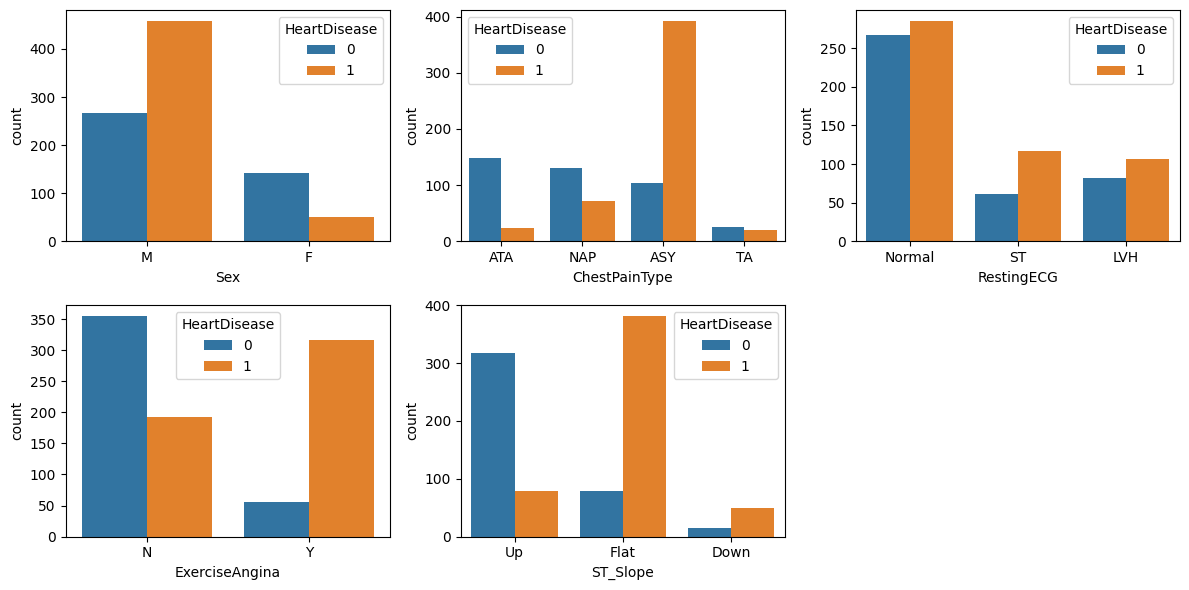

In [15]:
# 非数值数据的患病分布
categoricalfeatures = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
plt.figure(figsize=(12, 6))
for i in categoricalfeatures:
    ax = plt.subplot(2,3,categoricalfeatures.index(i)+1)
    sns.countplot(x= eda_data[i] , hue = eda_data['HeartDisease'])
plt.tight_layout()
plt.show()

> 结论：  
1.心力衰竭患者在男性中占比更高，在女性中占比低。  
2.在几种胸痛类型中，患者表现出无症状的数量最多。  
3.RestingECG在患者和非患者间表现出数值相差不明显。  
4.在患者中，运动诱发性心绞痛占比例较高。  
5.根据ST_Slope数值显示，患者大多ST曲线表现为水平型。  
Conclusion:  
1.Heart failure is more common in men and less common in women.  
2.Of the several types of chest pain, the largest number of patients showed no symptoms.  
3.RestingECG showed no significant difference in values between patients and non-patients.  
4.Exercise-induced angina pectoris accounted for a high proportion of patients.  
5.According to the value of ST_Slope, the ST curve of most patients is horizontal.

/var/folders/00/4sv93fnd3yz1qvh8ds_7yfz80000gn/T/ipykernel_40210/353332979.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


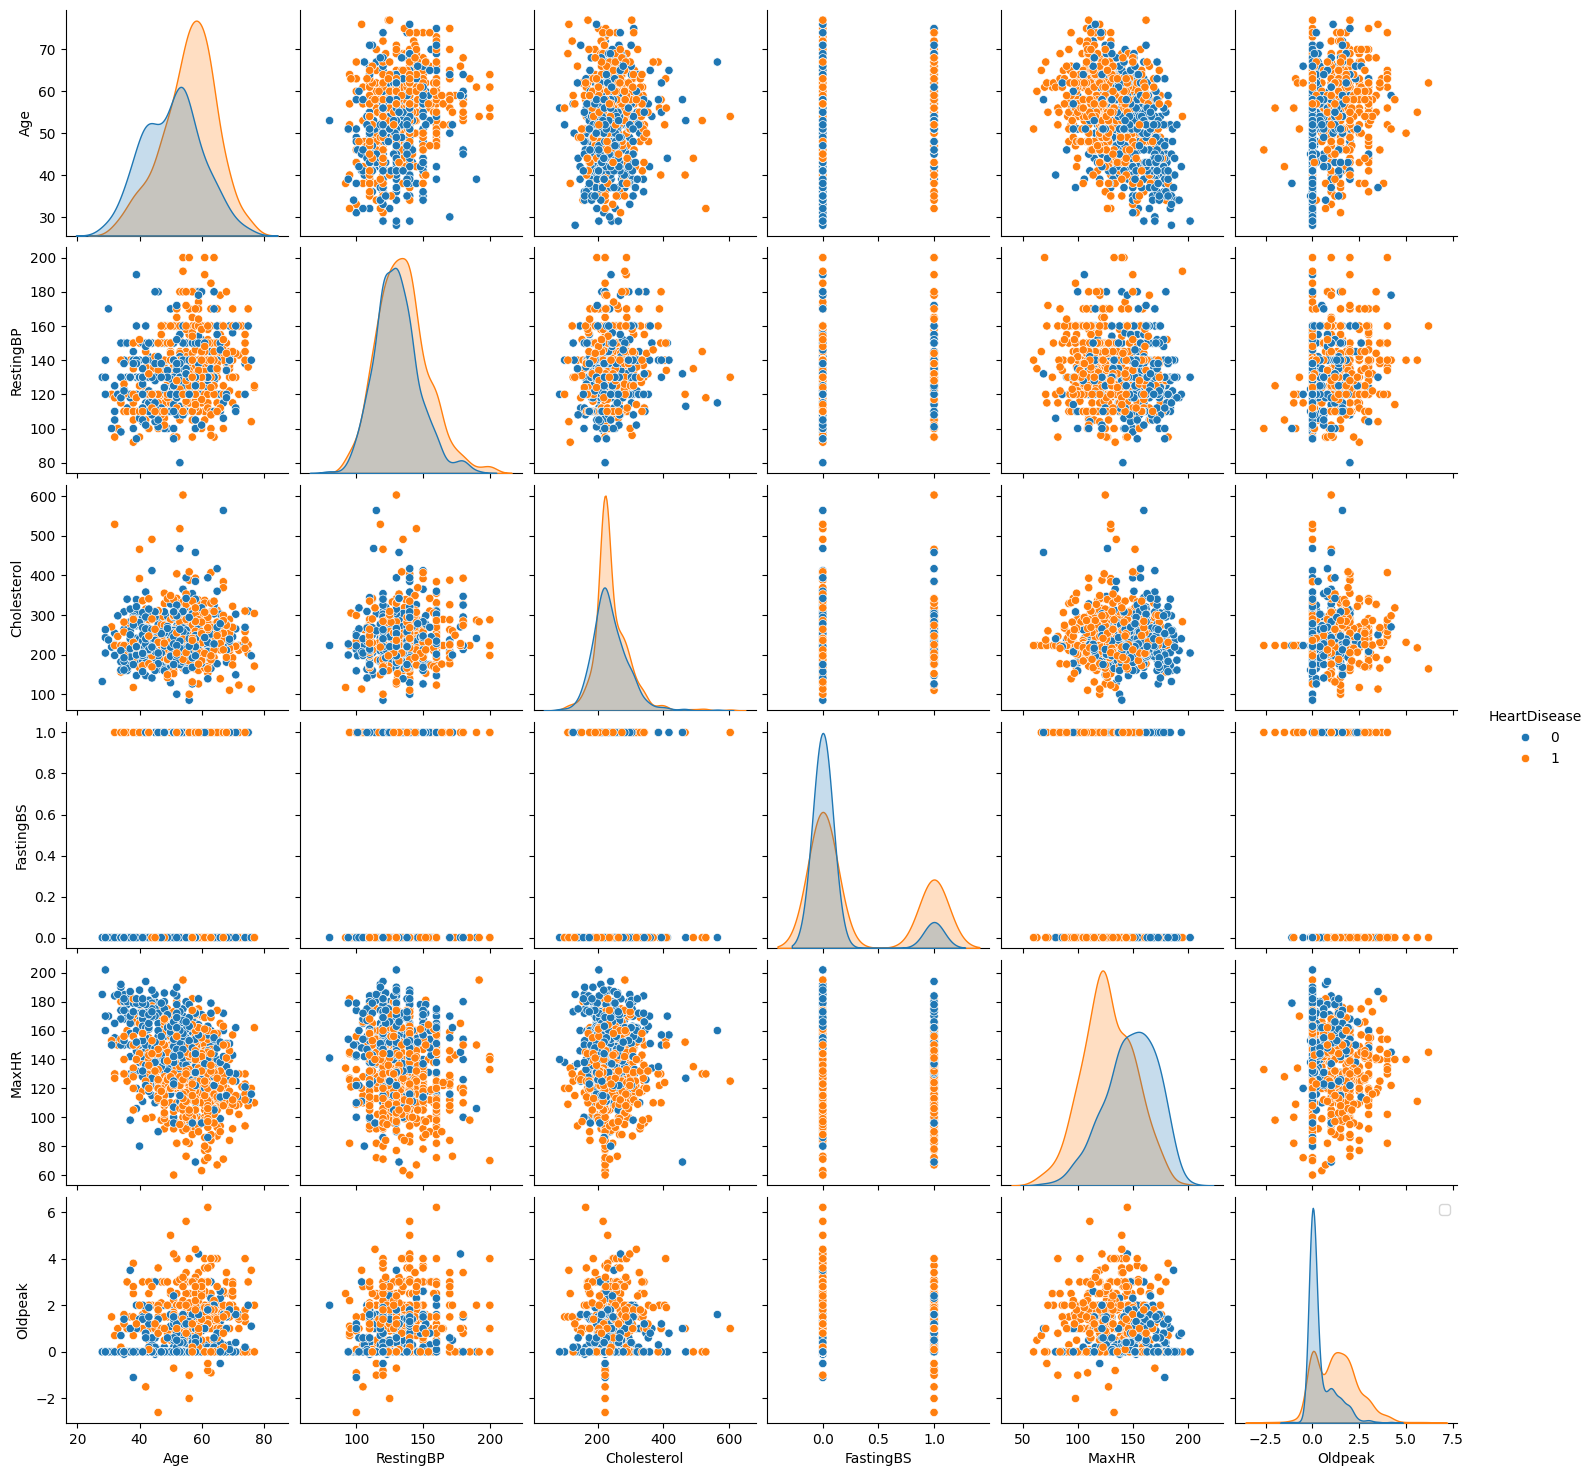

In [16]:
# 散点图矩阵
sns.pairplot(eda_data,hue='HeartDisease')
plt.legend()

---
## Model Analysis

### Public function(Making code more elegent)

In [11]:
"""
Author: deng.wei
Date: 4.15
Function: To generate metrix images by elegant way
"""
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, title="Confusion Matrix", labels=["0", "1"]):
    """
    Function to plot confusion matrix.

    Parameters:
    cm : ndarray
        Confusion matrix to be plotted.
    title : str
        Title of the plot.
    labels : list
        List of labels for the confusion matrix (default is ["0", "1"]).
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [10]:
"""
Author: deng.wei
Date: 4.15
Function: To generate evaluation indicators by elegant way(WITHOUT validation_set)
"""
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


def evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred):
    print("Training Set:")
    print(f"Accuracy     : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision    : {precision_score(y_train, y_train_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_train, y_train_pred):.4f}")
    print(f"Recall       : {recall_score(y_train, y_train_pred):.4f}")

    print("\nTest Set:")
    print(f"Accuracy     : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision    : {precision_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall       : {recall_score(y_test, y_test_pred):.4f}")


In [18]:
"""
Author: deng.wei
Date: 4.15
Function: To generate evaluation indicators by elegant way(INCLUDING validation_set)
"""
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def evaluate_model_outputs(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred):
    print("Training Set:")
    print(f"Accuracy     : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision    : {precision_score(y_train, y_train_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_train, y_train_pred):.4f}")
    print(f"Recall       : {recall_score(y_train, y_train_pred):.4f}")

    print("\nValidation Set:")
    print(f"Accuracy     : {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"Precision    : {precision_score(y_val, y_val_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_val, y_val_pred):.4f}")
    print(f"Recall       : {recall_score(y_val, y_val_pred):.4f}")

    print("\nTest Set:")
    print(f"Accuracy     : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision    : {precision_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall       : {recall_score(y_test, y_test_pred):.4f}")


### 1.KNN 

Training Set:
Accuracy     : 0.8624
Precision    : 0.8692
F1 Score     : 0.8767
Recall       : 0.8842

Test Set:
Accuracy     : 0.8587
Precision    : 0.8654
F1 Score     : 0.8738
Recall       : 0.8824

Cross-Validation (5-Fold):
CV Scores    : [0.87755102 0.81632653 0.82993197 0.78231293 0.7739726 ]
Mean Accuracy: 0.8160

Best K value: 7
Test set accuracy after tuning: 0.8587


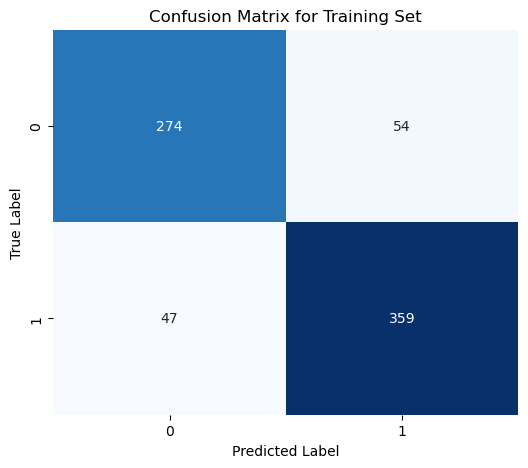

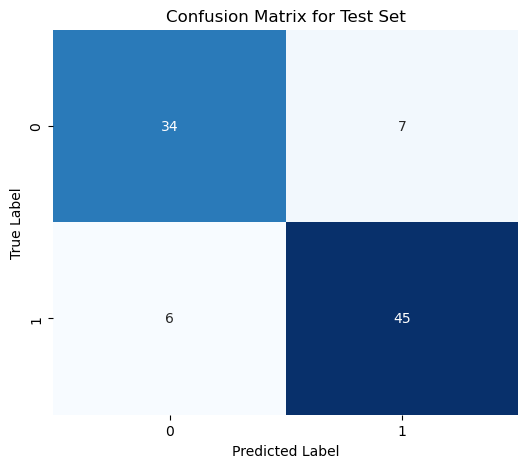

In [12]:
"""
KNN Model
Author: deng.wei
Date: 4.14
Function: KNN model implementation and evaluation
"""

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

# Cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation (5-Fold):")
print(f"CV Scores    : {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

# Tune K value using CV
k_range = range(1, 21)
cv_results = []
for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_k, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_results.append(score)

best_k = k_range[cv_results.index(max(cv_results))]
print(f"\nBest K value: {best_k}")

# Retrain with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_test_pred_best = knn_best.predict(X_test)
print(f"Test set accuracy after tuning: {accuracy_score(y_test, y_test_pred_best):.4f}")

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


### 2.Decision Tree

Training Set:
Accuracy     : 0.8815
Precision    : 0.8825
F1 Score     : 0.8943
Recall       : 0.9064

Test Set:
Accuracy     : 0.7609
Precision    : 0.7843
F1 Score     : 0.7843
Recall       : 0.7843


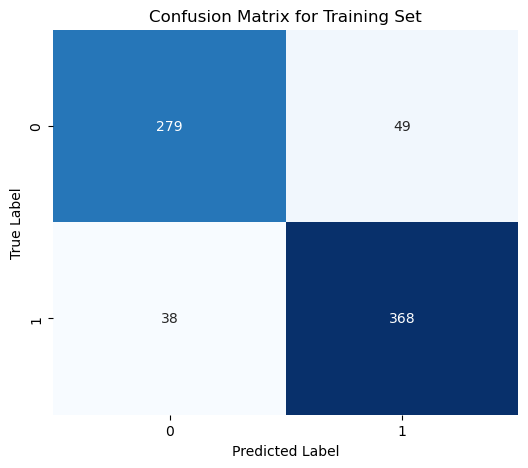

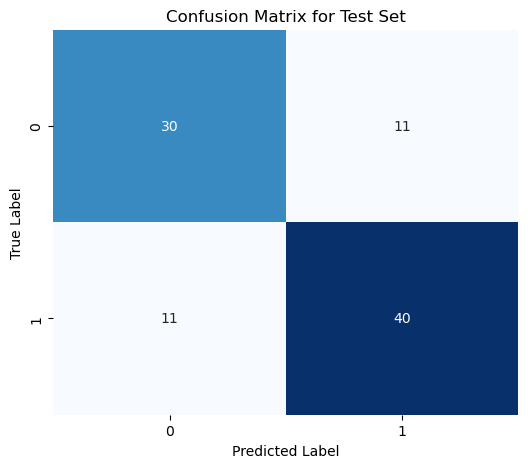

In [20]:
"""
Decision Tree Model
Author: deng.wei
Date: 4.14
Function: Decision Tree model implementation and evaluation
"""

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


### 3.Random Forest

/Users/dengwei/opt/anaconda3/envs/DSML/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training Set:
Accuracy     : 0.9278
Precision    : 0.9143
F1 Score     : 0.9354
Recall       : 0.9576

Validation Set:
Accuracy     : 0.7174
Precision    : 0.8788
F1 Score     : 0.6905
Recall       : 0.5686

Test Set:
Accuracy     : 0.8587
Precision    : 0.8932
F1 Score     : 0.8762
Recall       : 0.8598

Cross-Validation (10-Fold):
CV Scores    : [0.83783784 0.83783784 0.91891892 0.86486486 0.82191781 0.87671233
 0.82191781 0.82191781 0.89041096 0.79452055]
Mean Accuracy: 0.8487


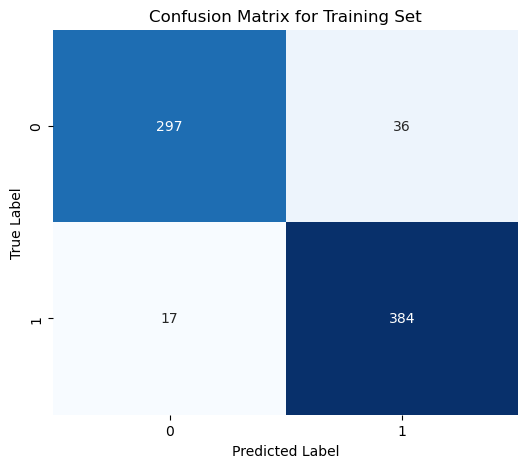

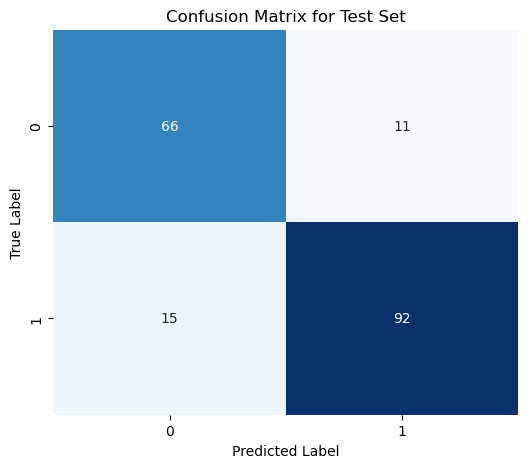

In [30]:
"""
Random Forest Model
Author: deng.wei
Date: 4.13
Function: Random Forest model implementation and evaluation
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Random Forest model
rf = RandomForestClassifier(
    random_state=42, 
    n_estimators=100,
    max_depth=8,
    min_samples_split=6,
    min_samples_leaf=3
)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

# Evaluate with your shared evaluation function (train + val + test)
evaluate_model_outputs(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred)

# Cross-validation (10-fold)
cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy') 
print("\nCross-Validation (10-Fold):")
print(f"CV Scores    : {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


### 4.Logistic Regression

Training Set:
Accuracy     : 0.8460
Precision    : 0.8600
F1 Score     : 0.8610
Recall       : 0.8621

Test Set:
Accuracy     : 0.8478
Precision    : 0.8491
F1 Score     : 0.8654
Recall       : 0.8824


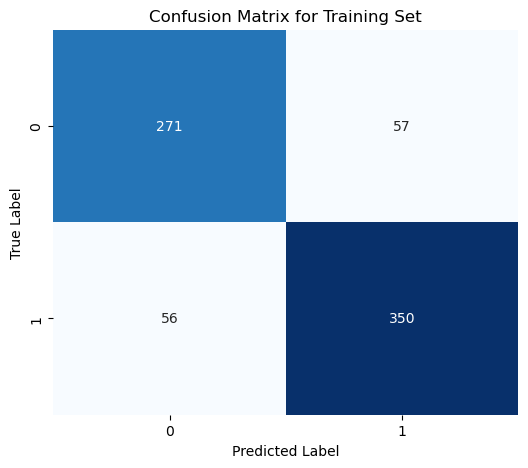

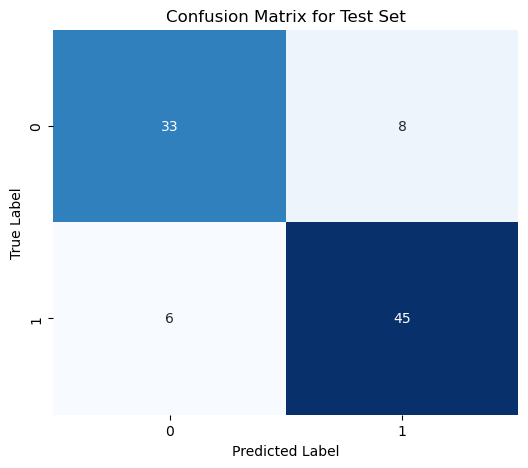

In [23]:
"""
Logistic Regression Model
Author: deng.wei
Date: 4.14
Function: Logistic Regression model implementation and evaluation
"""

from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluate using shared utility (no validation set)
evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


### 5.SVM

Training Set:
Accuracy     : 0.8815
Precision    : 0.8789
F1 Score     : 0.8948
Recall       : 0.9113

Test Set:
Accuracy     : 0.8696
Precision    : 0.8679
F1 Score     : 0.8846
Recall       : 0.9020


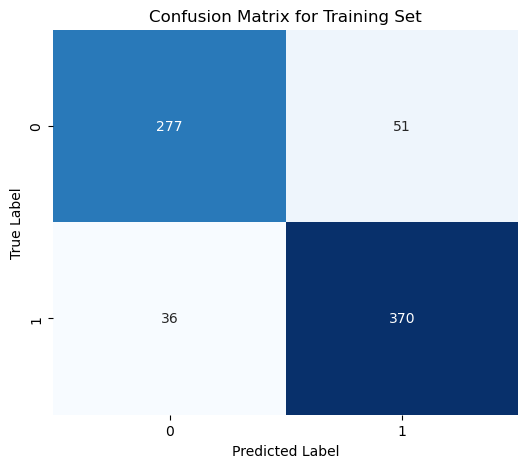

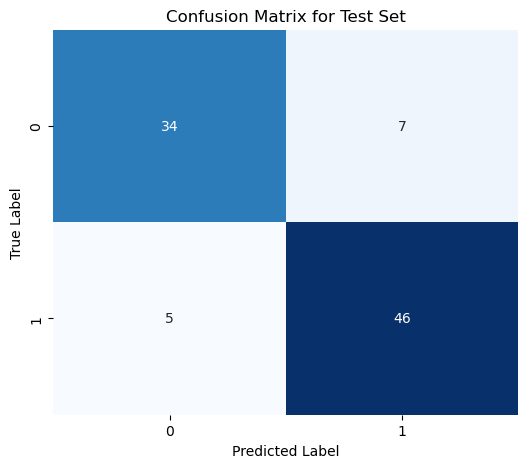

In [13]:
"""
SVM Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of the SVM model
"""

from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


### 6.Naive Bayes

Training Set:
Accuracy     : 0.8351
Precision    : 0.8645
F1 Score     : 0.8482
Recall       : 0.8325

Test Set:
Accuracy     : 0.9022
Precision    : 0.9038
F1 Score     : 0.9126
Recall       : 0.9216


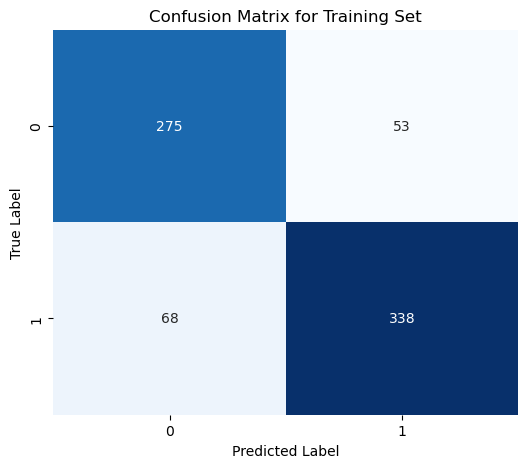

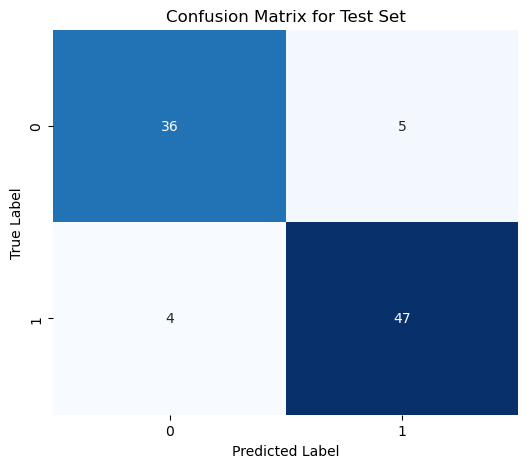

In [14]:
"""
Naive Bayes Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of the Naive Bayes model
"""

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


### 7.Neural Network

Training Set:
Accuracy     : 0.8515
Precision    : 0.8650
F1 Score     : 0.8639
Recall       : 0.8628

Test Set:
Accuracy     : 0.8098
Precision    : 0.8913
F1 Score     : 0.8241
Recall       : 0.7664

Cross-validation accuracy scores: [0.82993197 0.80272109 0.85034014 0.82993197 0.82876712]
Mean cross-validation accuracy: 0.8283


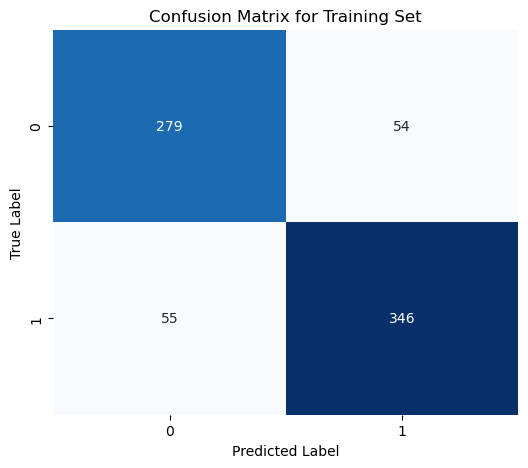

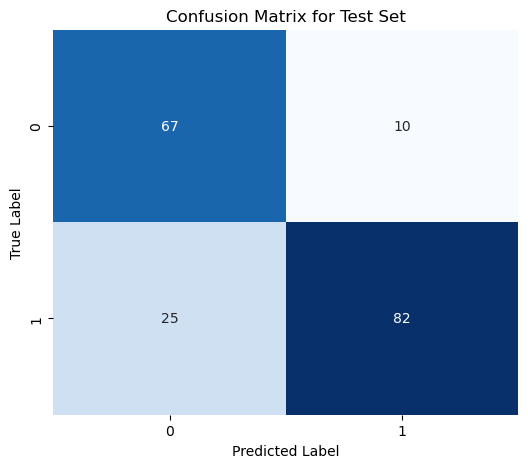

In [28]:
"""
Neural Network Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of a neural network model
"""

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a neural network model with regularization and early stopping
mlp = MLPClassifier(
    max_iter=1000,
    learning_rate_init=0.001,
    alpha=0.001,            # L2 regularization
    early_stopping=True,    # Enable early stopping
    random_state=42
)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cross_val_scores = cross_val_score(mlp, X_train, y_train, cv=5)
print(f"\nCross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.4f}")

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


### 8.Gradient Descent 

Training Set:
Accuracy     : 0.7561
Precision    : 0.7546
F1 Score     : 0.7861
Recall       : 0.8204

Test Set:
Accuracy     : 0.7772
Precision    : 0.8113
F1 Score     : 0.8075
Recall       : 0.8037


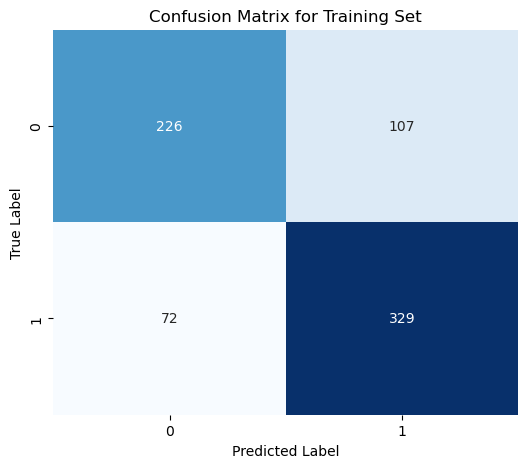

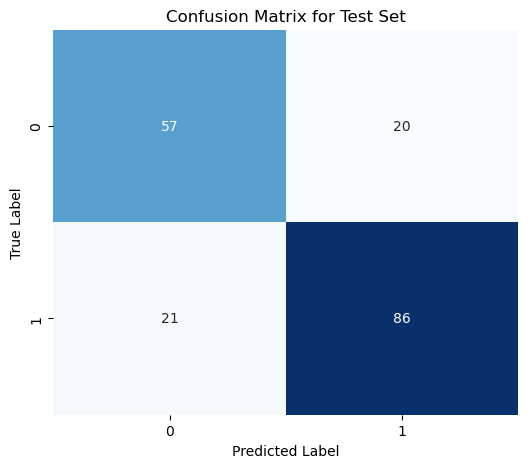

In [27]:
"""
Gradient Descent Model  
Author: deng.wei  
Date: 4.15  
Function: Implementation and evaluation of a gradient-based model
"""

from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(X_train, y_train)

y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)

evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")


---
## Model Evaluation

In [17]:
# 评估模型

## Predict result

In [ ]:
# 选择合适的模型后进行结果预测